# Romani v knjigarni Felix

Analizirali bomo romane, ki so na voljo v knjigarni Felix.

Najprej si bomo ogledali razporeditev romanov glede na leto izdaje. V drugem delu bomo raziskali povazave med vezavo, ceno in številom strani, v tretjem delu pa se bomo posvetili avtorjem in prevajalcem.

In [1]:
import pandas as pd
import matplotlib

# grafi se izrisujejo v notebooku
%matplotlib inline

romani = pd.read_csv('csv_podatki/romani.csv')

pd.options.display.max_rows = 10
pd.options.display.max_columns = 10

In [2]:
romani[['naslov','avtor','dimenzije','prevajalec','vezava','zalozba']] = romani[['naslov','avtor','dimenzije','prevajalec','vezava','zalozba']].replace('0','neznano')
romani[['naslov','avtor','dimenzije','prevajalec','vezava','zalozba']].replace('0','neznano')

,naslov,avtor,dimenzije,prevajalec,vezava,zalozba
0,Petdeset odtenkov svobode (Žepna knjiga),E L James,13 x 19 cm,Alenka Perger,žepna,"Učila International, d.o.o."
1,"&Scaron;KOT, KI ME JE RE&Scaron;IL (Trda vezava)",Hannah Howell,130 x 195 x 27,Katja Bizjak,trda,"Učila International, d.o.o."
2,Petdeset odtenkov - komplet Žepnih knjig,E L James,13 x 19 cm,neznano,mehka,"Učila International, d.o.o."
3,TEMAČNI MOŽ (Žepna knjiga),Jens Henrik Jensen,125 x 190 x 31,Mateja Malnar &Scaron;tembal,mehka,"Učila International, d.o.o."
4,TEMAČNI MOŽ (Trda vezava),Jens Henrik Jensen,130 x 195 x 35,Mateja Malnar &Scaron;tembal,trda,"Učila International, d.o.o."
...,...,...,...,...,...,...
1019,Afganistanec (Trda vezava),Frederick Forsyth,"13 x 19,5 cm",Samo Ku&scaron;čer,trda,Učila International d.o.o.
1020,Solze biserne (Žepna knjiga),Tasha Alexander,13 x 19 cm,Suzana Pečnik,broširana,neznano
1021,Varno zavetje (trda vezava),Nicholas Sparks,"13 x 19,5 cm",Nata&scaron;a Grom,trda,Učila International d.o.o.
1022,Ubijaj ali umri (Žepna knjiga),Urban Waite,"12,5 x 19 cm",Jedrt Maležič,žepna,Učila International d.o.o.


Opomba: Znak "0" označuje prazna mesta, torej manjkajoče podatke za posamezne romane.

## Romani glede na leto izdaje

In [3]:
romani_po_letih = romani[romani.leto_izdaje >= 1000].groupby('leto_izdaje')

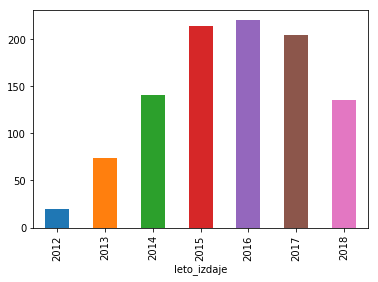

In [4]:
romani_po_letih.size().plot.bar()

V knjigarni Felix so očitno na voljo le romani, mlajši od 7 let. Največ jih je iz obdobja 2015-2017, iz česar lahko sklepamo, da raje hranijo mlajše knjige. Iz leta 2018 je glede na prej omenjena leta malo knjig, kar pomeni, da knjige v knjigarno prispejo z zamudo.

## Povezave med ceno, številom strani in vezavo

In [5]:
najvec_strani = romani.sort_values('stevilo_strani', ascending=False)[['naslov','avtor', 'stevilo_strani']][:10]
najdrazji_romani = romani.sort_values('cena_v_evrih', ascending=False)[['naslov','avtor', 'vezava', 'cena_v_evrih']][:10]
romani_po_vezavi = romani.groupby('vezava')

In [6]:
najvec_strani

,naslov,avtor,stevilo_strani
976,Dežela poslikanih jam (trda vezava),Jean M. Auel,384368
2,Petdeset odtenkov - komplet Žepnih knjig,E L James,1500
816,Komplet Nicholas Sparks - 4 uspe&scaron;nice,Nicholas Sparks,1429
612,KOMPLET Sarah Maclean (3 ŽK),Sarah MacLean,1194
795,Komplet 3x ŽK Loretta Chase,Loretta Chase,1027
615,KOMPLET Mary Balogh (3 ŽK),Mary Balogh,1010
630,Prvič na robu (trda vezava),Anna Todd,766
626,Prvič na robu (Žepna knjiga),Anna Todd,766
812,Zdravnik (Žepna knjiga),Noah Gordon,732
805,Zdravnik (Trda vezava),Noah Gordon,732


 Pričakovano imajo največ strani kompleti romanov.

In [7]:
najdrazji_romani

,naslov,avtor,vezava,cena_v_evrih
686,Romar (trda vezava),Terry Hayes,trda,44.9
630,Prvič na robu (trda vezava),Anna Todd,trda,42.9
56,ČAROVNICA (Trda vezava),Camilla Lackberg,trda,39.9
598,prvič narazen (trda vezava),Anna Todd,trda,39.9
639,Za vedno v tvojem objemu (trda vezava),Kathleen Woodiwiss,trda,39.9
589,Napad na kraljevino Tearling (trda vezava),Erika Johansen,trda,36.9
402,Čas je morilec (trda vezava),Michel Bussi,trda,36.9
339,Angelski delež (trda vezava),J. R. Ward,trda,36.9
322,Lepa v smrti (trda vezava),Peter James,trda,36.9
238,Premalo mrtev (trda vezava),Peter James,trda,36.9


Opazimo, da so vsi najdražji romani trde vezave, kar pa potrdi tudi spodnja preglednica, ki prikazuje povprečne cene romanov v posameznih vezavah.

In [8]:
round(romani_po_vezavi.cena_v_evrih.mean(), 2)

vezava
broširana     9.67
mehka        12.22
neznano      20.26
trda         24.18
žepna         7.72
Name: cena_v_evrih, dtype: float64

Preseneti nas, da se ne pojavi veliko dragih romanov med tistimi z največ stranmi, in obratno. Oglejmo si povezavo med ceno in številom strani.

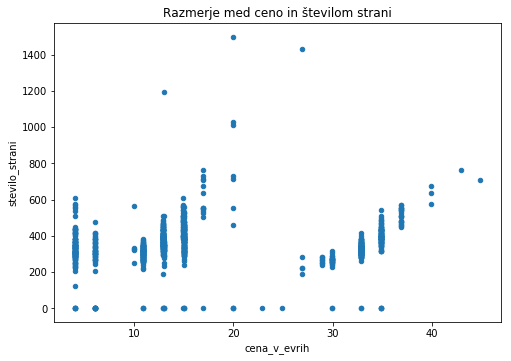

In [9]:
romani[romani.stevilo_strani < 150000].plot.scatter(
    x='cena_v_evrih', 
    y='stevilo_strani', 
    title='Razmerje med ceno in številom strani',
    figsize=(8,5.5))

Iz grafa je razvidno, da ni posebne povezave med številom strani in ceno romana. Sklepamo lahko, da so daljši romani manj priljubljeni in se posledično težje prodajo.
Graf pa nam pokaže tudi, da knjigarna ni preveč domiselna pri izbiri cene. Zelo veliko knjig ima isto ceno, različnih cen pa je malo.

## Avtorji in prevajalci

Ogledali si bomo, kateri avtor je napisal največ romanov, oziroma ali obstaja najbolj priljubljen avtor romanov v Sloveniji.

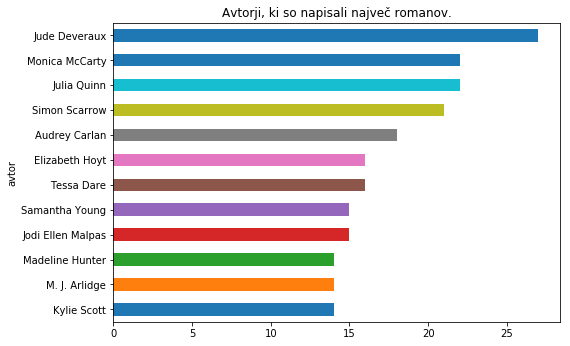

In [10]:
gostota_avtorjev = romani.groupby(['avtor']).size().sort_values()
graf_avtorjev = gostota_avtorjev[-12:].plot.barh(title='Avtorji, ki so napisali največ romanov.', figsize=(8,5.5))

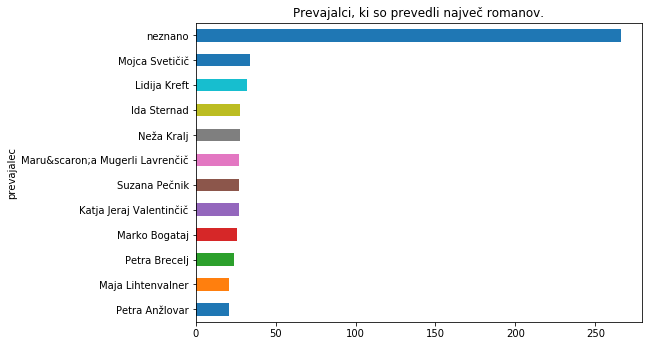

In [11]:
gostota_prevajalcev = romani.groupby(['prevajalec']).size().sort_values()
gostota_prevajalcev[-12:].plot.barh(title='Prevajalci, ki so prevedli največ romanov.', figsize=(8,5.5))

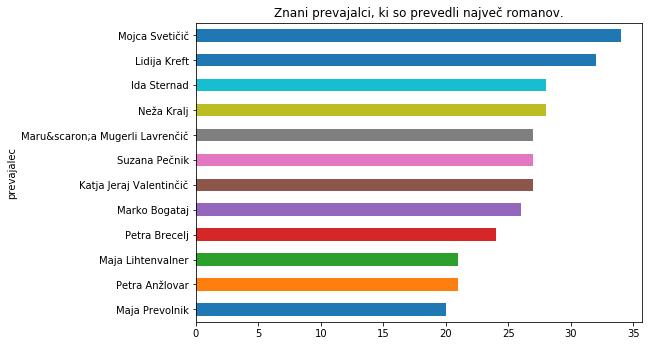

In [12]:
gostota_prevajalcev_brez_neznanih = romani[romani.prevajalec != 'neznano'].groupby(['prevajalec']).size().sort_values()
gostota_prevajalcev_brez_neznanih[-12:].plot.barh(title='Znani prevajalci, ki so prevedli največ romanov.', figsize=(8,5.5))

Opazimo, da so tako avtorji kot prevajalci enakomerno porazdeljeni. To pomeni, da v Sloveniji nihče od avtorjev ne izstopa po priljubljenosti. Kar se tiče prevajalcev, lahko sklepamo, da je delo v založbi Učila International, d.o.o, enakomerno porazdeljeno med delavce. Bolj zanimivo pa je to, da pri večini knjig prevajalec ni znan (0 označuje prazna polja) - gre za neprevedene romane.

Oglejmo si romane, katerih prevajalec ni znan.

In [13]:
romani[romani.prevajalec == 'neznano']

,sifra,naslov,avtor,cena_v_evrih,stevilo_strani,dimenzije,leto_izdaje,prevajalec,vezava,zalozba
2,11999,Petdeset odtenkov - komplet Žepnih knjig,E L James,19.99,1500,13 x 19 cm,2012,neznano,mehka,"Učila International, d.o.o."
72,4457,STROGA TAJNOST (trda vezava),Karen Cleveland,32.90,300,130 x 195 x 26 mm,2018,neznano,trda,"Učila International, d.o.o."
87,4379,PRIJATELJ (trda vezava),Joakim Zander,34.90,440,130 x 195 x 37 mm,2018,neznano,trda,"Učila International, d.o.o."
103,4455,VOJVODA V BLE&Scaron;ČEČEM OKLEPU (trda vezava),Loretta Chase,34.90,364,130 x 195 x 31 mm,2018,neznano,trda,"Učila International, d.o.o."
123,13591,PETDESET ODTENKOV SVOBODE (Žepna knjiga),E L James,3.99,608,125 x 190 x 40,2017,neznano,mehka,"Učila International, d.o.o."
...,...,...,...,...,...,...,...,...,...,...
525,13372,Povabilo (Žepna knjiga),Ruth Ware,12.90,358,125 x 190 x 27 mm,2016,neznano,broširana,"Učila International, d.o.o."
527,13355,Odre&scaron;itev Callie in Kaydena (Žepna knjiga),Jessica Sorensen,3.99,304,125 x 190 x 22 mm,2016,neznano,broširana,"Učila International, d.o.o."
533,3814,Prelepi ženskar (trda vezava),neznano,32.90,0,neznano,0,neznano,neznano,neznano
681,3641,Izdajalska roka (trda vezava),neznano,6.00,0,neznano,0,neznano,neznano,neznano


Velika večina avtorjev je tujcev, kar pomeni, da Slovenci raje beremo tuje romane v izvirniku, kot pa domače. To ni presenetljivo, ker je le težko najti sodobnega slovenskega pisatelja romanov.